In [1]:
# ------------------  set up logging ----------------------
import logging
from auditory_cortex.utils import set_up_logging
set_up_logging('info')

import os
import scipy
import numpy as np
import seaborn as sns
from functools import reduce

from auditory_cortex.plotters import tikzplots
from auditory_cortex.analyses import Correlations, STRFCorrelations
from auditory_cortex.plotters.correlation_plotter import RegPlotter
from auditory_cortex.plotters.plotter_utils import PlotterUtils

import matplotlib.pylab as plt
import matplotlib as mpl
%matplotlib inline


    If you do not have SoX, proceed here:
     - - - http://sox.sourceforge.net/ - - -

    If you do (or think that you should) have SoX, double-check your
    path variables.
    


/bin/sh: line 1: sox: command not found
/home/ahmedb/projects/Wav2Letter/deepspeech.pytorch/deepspeech_pytorch/loader/data_loader.py:17: UserWarning: torchaudio._backend.set_audio_backend has been deprecated. With dispatcher enabled, this function is no-op. You can remove the function call.
  torchaudio.set_audio_backend("sox_io")


## paper figures

In [2]:
save_tikz=False
threshold=0.3
lag = 200

### all models combined

#### timit

INFO:Extracting column: normalized_test_cc
INFO:Filtering 'normalizer' using multiple of 1.000 with std dev ...
INFO:Extracting column: normalized_test_cc
INFO:Filtering 'normalizer' using multiple of 1.000 with std dev ...


/tmp/ipykernel_861318/3905256420.py:13: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  tikzplots.plot_peak_layer_histograms_all_models(
/tmp/ipykernel_861318/3905256420.py:13: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  tikzplots.plot_peak_layer_histograms_all_models(


INFO:Extracting column: normalized_test_cc
INFO:Filtering 'normalizer' using multiple of 1.000 with std dev ...
INFO:Extracting column: normalized_test_cc
INFO:Filtering 'normalizer' using multiple of 1.000 with std dev ...


/tmp/ipykernel_861318/3905256420.py:13: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  tikzplots.plot_peak_layer_histograms_all_models(
/tmp/ipykernel_861318/3905256420.py:13: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  tikzplots.plot_peak_layer_histograms_all_models(


INFO:Extracting column: normalized_test_cc
INFO:Filtering 'normalizer' using multiple of 1.000 with std dev ...
INFO:Extracting column: normalized_test_cc
INFO:Filtering 'normalizer' using multiple of 1.000 with std dev ...


/tmp/ipykernel_861318/3905256420.py:13: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  tikzplots.plot_peak_layer_histograms_all_models(
/tmp/ipykernel_861318/3905256420.py:13: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  tikzplots.plot_peak_layer_histograms_all_models(


INFO:Extracting column: normalized_test_cc
INFO:Filtering 'normalizer' using multiple of 1.000 with std dev ...
INFO:Extracting column: normalized_test_cc
INFO:Filtering 'normalizer' using multiple of 1.000 with std dev ...


/tmp/ipykernel_861318/3905256420.py:13: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  tikzplots.plot_peak_layer_histograms_all_models(
/tmp/ipykernel_861318/3905256420.py:13: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  tikzplots.plot_peak_layer_histograms_all_models(


INFO:Extracting column: normalized_test_cc
INFO:Filtering 'normalizer' using multiple of 1.000 with std dev ...
INFO:Extracting column: normalized_test_cc
INFO:Filtering 'normalizer' using multiple of 1.000 with std dev ...


/tmp/ipykernel_861318/3905256420.py:13: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  tikzplots.plot_peak_layer_histograms_all_models(
/tmp/ipykernel_861318/3905256420.py:13: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  tikzplots.plot_peak_layer_histograms_all_models(


INFO:Extracting column: normalized_test_cc
INFO:Filtering 'normalizer' using multiple of 1.000 with std dev ...
INFO:Extracting column: normalized_test_cc
INFO:Filtering 'normalizer' using multiple of 1.000 with std dev ...
INFO:Number of channels in core: 1416
INFO:Number of channels in non-primary: 300


/tmp/ipykernel_861318/3905256420.py:13: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  tikzplots.plot_peak_layer_histograms_all_models(
/tmp/ipykernel_861318/3905256420.py:13: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  tikzplots.plot_peak_layer_histograms_all_models(


INFO:Saved: /depot/jgmakin/data/auditory_cortex/results/tikz_plots/gap-1.0-peak-layer-histogram-trf200-timit-50ms-all-models.png


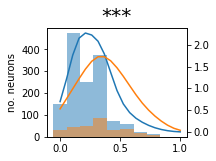

In [15]:
model_names = [
	'deepspeech2',
	'speech2text',
	'whisper_tiny',
	'whisper_base',
	'wav2vec2',
	'wav2letter_modified',
	]
trained_identifier = f'ucsf_timit_trf_lags{lag}_bw50_regression_improved'
tikz_indicator = f'trf{lag}'
bin_width = 50
mVocs = False
tikzplots.plot_peak_layer_histograms_all_models(
	model_names,
	trained_identifier,
	bin_width=bin_width,
	mVocs=mVocs,
	threshold=threshold,
	save_tikz=save_tikz,
    tikz_indicator=tikz_indicator,
	fontsize=20,
	figsize=(2.5,2),
	)


#### mVocs

INFO:Extracting column: mVocs_normalized_test_cc
INFO:Filtering 'mVocs_normalizer' using multiple of 1.000 with std dev ...
INFO:Extracting column: mVocs_normalized_test_cc
INFO:Filtering 'mVocs_normalizer' using multiple of 1.000 with std dev ...


/tmp/ipykernel_861318/3047753942.py:13: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  tikzplots.plot_peak_layer_histograms_all_models(
/tmp/ipykernel_861318/3047753942.py:13: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  tikzplots.plot_peak_layer_histograms_all_models(


INFO:Extracting column: mVocs_normalized_test_cc
INFO:Filtering 'mVocs_normalizer' using multiple of 1.000 with std dev ...
INFO:Extracting column: mVocs_normalized_test_cc
INFO:Filtering 'mVocs_normalizer' using multiple of 1.000 with std dev ...


/tmp/ipykernel_861318/3047753942.py:13: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  tikzplots.plot_peak_layer_histograms_all_models(
/tmp/ipykernel_861318/3047753942.py:13: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  tikzplots.plot_peak_layer_histograms_all_models(


INFO:Extracting column: mVocs_normalized_test_cc
INFO:Filtering 'mVocs_normalizer' using multiple of 1.000 with std dev ...
INFO:Extracting column: mVocs_normalized_test_cc
INFO:Filtering 'mVocs_normalizer' using multiple of 1.000 with std dev ...


/tmp/ipykernel_861318/3047753942.py:13: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  tikzplots.plot_peak_layer_histograms_all_models(
/tmp/ipykernel_861318/3047753942.py:13: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  tikzplots.plot_peak_layer_histograms_all_models(


INFO:Extracting column: mVocs_normalized_test_cc
INFO:Filtering 'mVocs_normalizer' using multiple of 1.000 with std dev ...
INFO:Extracting column: mVocs_normalized_test_cc
INFO:Filtering 'mVocs_normalizer' using multiple of 1.000 with std dev ...


/tmp/ipykernel_861318/3047753942.py:13: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  tikzplots.plot_peak_layer_histograms_all_models(
/tmp/ipykernel_861318/3047753942.py:13: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  tikzplots.plot_peak_layer_histograms_all_models(


INFO:Extracting column: mVocs_normalized_test_cc
INFO:Filtering 'mVocs_normalizer' using multiple of 1.000 with std dev ...
INFO:Extracting column: mVocs_normalized_test_cc
INFO:Filtering 'mVocs_normalizer' using multiple of 1.000 with std dev ...


/tmp/ipykernel_861318/3047753942.py:13: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  tikzplots.plot_peak_layer_histograms_all_models(
/tmp/ipykernel_861318/3047753942.py:13: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  tikzplots.plot_peak_layer_histograms_all_models(


INFO:Extracting column: mVocs_normalized_test_cc
INFO:Filtering 'mVocs_normalizer' using multiple of 1.000 with std dev ...
INFO:Extracting column: mVocs_normalized_test_cc
INFO:Filtering 'mVocs_normalizer' using multiple of 1.000 with std dev ...
INFO:Number of channels in core: 1548
INFO:Number of channels in non-primary: 612


/tmp/ipykernel_861318/3047753942.py:13: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  tikzplots.plot_peak_layer_histograms_all_models(
/tmp/ipykernel_861318/3047753942.py:13: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  tikzplots.plot_peak_layer_histograms_all_models(


INFO:Saved: /depot/jgmakin/data/auditory_cortex/results/tikz_plots/gap-1.0-peak-layer-histogram-trf200-mVocs-50ms-all-models.png


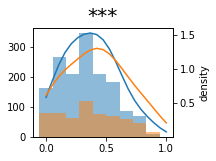

In [16]:
model_names = [
	'deepspeech2',
	'speech2text',
	'whisper_tiny',
	'whisper_base',
	'wav2vec2',
	'wav2letter_modified',
	]
trained_identifier = f'ucsf_mVocs_trf_lags{lag}_bw50_regression_improved'
tikz_indicator = f'trf{lag}'
bin_width = 50
mVocs = True
tikzplots.plot_peak_layer_histograms_all_models(
	model_names,
	trained_identifier,
	bin_width=bin_width,
	mVocs=mVocs,
	threshold = threshold,
	save_tikz=save_tikz,
    tikz_indicator=tikz_indicator,
	fontsize=20,
	figsize=(2.5,2),
	)

### models separately

#### timit

INFO:Extracting column: normalized_test_cc
INFO:Filtering 'normalizer' using multiple of 1.000 with std dev ...
INFO:Extracting column: normalized_test_cc
INFO:Filtering 'normalizer' using multiple of 1.000 with std dev ...
INFO:Number of channels in core: 236
INFO:Number of channels in non-primary: 50


/tmp/ipykernel_861318/2948361633.py:13: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  tikzplots.plot_peak_layer_histograms(
/tmp/ipykernel_861318/2948361633.py:13: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  tikzplots.plot_peak_layer_histograms(


INFO:Saved: /depot/jgmakin/data/auditory_cortex/results/tikz_plots/gap-1.0-peak-layer-histogram-trf200-timit-50ms-wav2letter_modified.png
INFO:Extracting column: normalized_test_cc
INFO:Filtering 'normalizer' using multiple of 1.000 with std dev ...
INFO:Extracting column: normalized_test_cc
INFO:Filtering 'normalizer' using multiple of 1.000 with std dev ...
INFO:Number of channels in core: 236
INFO:Number of channels in non-primary: 50


/tmp/ipykernel_861318/2948361633.py:13: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  tikzplots.plot_peak_layer_histograms(
/tmp/ipykernel_861318/2948361633.py:13: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  tikzplots.plot_peak_layer_histograms(


INFO:Saved: /depot/jgmakin/data/auditory_cortex/results/tikz_plots/gap-1.0-peak-layer-histogram-trf200-timit-50ms-wav2vec2.png
INFO:Extracting column: normalized_test_cc
INFO:Filtering 'normalizer' using multiple of 1.000 with std dev ...
INFO:Extracting column: normalized_test_cc
INFO:Filtering 'normalizer' using multiple of 1.000 with std dev ...
INFO:Number of channels in core: 236
INFO:Number of channels in non-primary: 50


/tmp/ipykernel_861318/2948361633.py:13: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  tikzplots.plot_peak_layer_histograms(
/tmp/ipykernel_861318/2948361633.py:13: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  tikzplots.plot_peak_layer_histograms(


INFO:Saved: /depot/jgmakin/data/auditory_cortex/results/tikz_plots/gap-1.0-peak-layer-histogram-trf200-timit-50ms-speech2text.png
INFO:Extracting column: normalized_test_cc
INFO:Filtering 'normalizer' using multiple of 1.000 with std dev ...
INFO:Extracting column: normalized_test_cc
INFO:Filtering 'normalizer' using multiple of 1.000 with std dev ...
INFO:Number of channels in core: 236
INFO:Number of channels in non-primary: 50
INFO:Saved: /depot/jgmakin/data/auditory_cortex/results/tikz_plots/gap-1.0-peak-layer-histogram-trf200-timit-50ms-whisper_tiny.png


/tmp/ipykernel_861318/2948361633.py:13: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  tikzplots.plot_peak_layer_histograms(
/tmp/ipykernel_861318/2948361633.py:13: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  tikzplots.plot_peak_layer_histograms(


INFO:Extracting column: normalized_test_cc
INFO:Filtering 'normalizer' using multiple of 1.000 with std dev ...
INFO:Extracting column: normalized_test_cc
INFO:Filtering 'normalizer' using multiple of 1.000 with std dev ...
INFO:Number of channels in core: 236
INFO:Number of channels in non-primary: 50
INFO:Saved: /depot/jgmakin/data/auditory_cortex/results/tikz_plots/gap-1.0-peak-layer-histogram-trf200-timit-50ms-whisper_base.png


/tmp/ipykernel_861318/2948361633.py:13: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  tikzplots.plot_peak_layer_histograms(
/tmp/ipykernel_861318/2948361633.py:13: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  tikzplots.plot_peak_layer_histograms(


INFO:Extracting column: normalized_test_cc
INFO:Filtering 'normalizer' using multiple of 1.000 with std dev ...
INFO:Extracting column: normalized_test_cc
INFO:Filtering 'normalizer' using multiple of 1.000 with std dev ...
INFO:Number of channels in core: 236
INFO:Number of channels in non-primary: 50


/tmp/ipykernel_861318/2948361633.py:13: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  tikzplots.plot_peak_layer_histograms(
/tmp/ipykernel_861318/2948361633.py:13: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  tikzplots.plot_peak_layer_histograms(


INFO:Saved: /depot/jgmakin/data/auditory_cortex/results/tikz_plots/gap-1.0-peak-layer-histogram-trf200-timit-50ms-deepspeech2.png


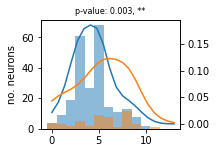

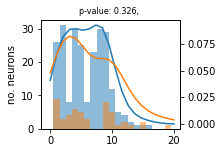

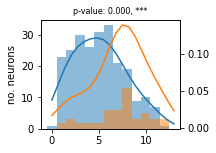

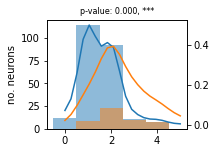

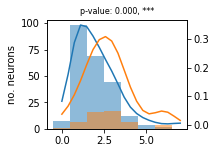

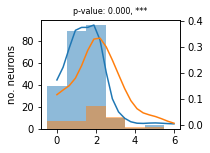

In [17]:
model_names = [
    'wav2letter_modified',
    'wav2vec2',
    'speech2text',
	'whisper_tiny',
	'whisper_base',
	'deepspeech2',
	]
trained_identifier = f'ucsf_timit_trf_lags{lag}_bw50_regression_improved'
tikz_indicator = f'trf{lag}'
bin_width = 50
mVocs = False
tikzplots.plot_peak_layer_histograms(
	model_names,
	trained_identifier,
	bin_width=bin_width,
	mVocs=mVocs,
	threshold = threshold,
    tikz_indicator=tikz_indicator,
    save_tikz=save_tikz,
	fontsize=8,
	figsize=(2.5,2),
	)

#### mVocs

INFO:Extracting column: mVocs_normalized_test_cc
INFO:Filtering 'mVocs_normalizer' using multiple of 1.000 with std dev ...
INFO:Extracting column: mVocs_normalized_test_cc
INFO:Filtering 'mVocs_normalizer' using multiple of 1.000 with std dev ...
INFO:Number of channels in core: 258
INFO:Number of channels in non-primary: 102


/tmp/ipykernel_861318/1851153365.py:13: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  tikzplots.plot_peak_layer_histograms(
/tmp/ipykernel_861318/1851153365.py:13: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  tikzplots.plot_peak_layer_histograms(


INFO:Saved: /depot/jgmakin/data/auditory_cortex/results/tikz_plots/gap-1.0-peak-layer-histogram-trf200-mVocs-50ms-wav2letter_modified.png
INFO:Extracting column: mVocs_normalized_test_cc
INFO:Filtering 'mVocs_normalizer' using multiple of 1.000 with std dev ...
INFO:Extracting column: mVocs_normalized_test_cc
INFO:Filtering 'mVocs_normalizer' using multiple of 1.000 with std dev ...
INFO:Number of channels in core: 258
INFO:Number of channels in non-primary: 102


/tmp/ipykernel_861318/1851153365.py:13: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  tikzplots.plot_peak_layer_histograms(
/tmp/ipykernel_861318/1851153365.py:13: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  tikzplots.plot_peak_layer_histograms(


INFO:Saved: /depot/jgmakin/data/auditory_cortex/results/tikz_plots/gap-1.0-peak-layer-histogram-trf200-mVocs-50ms-wav2vec2.png
INFO:Extracting column: mVocs_normalized_test_cc
INFO:Filtering 'mVocs_normalizer' using multiple of 1.000 with std dev ...
INFO:Extracting column: mVocs_normalized_test_cc
INFO:Filtering 'mVocs_normalizer' using multiple of 1.000 with std dev ...
INFO:Number of channels in core: 258
INFO:Number of channels in non-primary: 102


/tmp/ipykernel_861318/1851153365.py:13: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  tikzplots.plot_peak_layer_histograms(
/tmp/ipykernel_861318/1851153365.py:13: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  tikzplots.plot_peak_layer_histograms(


INFO:Saved: /depot/jgmakin/data/auditory_cortex/results/tikz_plots/gap-1.0-peak-layer-histogram-trf200-mVocs-50ms-speech2text.png
INFO:Extracting column: mVocs_normalized_test_cc
INFO:Filtering 'mVocs_normalizer' using multiple of 1.000 with std dev ...
INFO:Extracting column: mVocs_normalized_test_cc
INFO:Filtering 'mVocs_normalizer' using multiple of 1.000 with std dev ...
INFO:Number of channels in core: 258
INFO:Number of channels in non-primary: 102


/tmp/ipykernel_861318/1851153365.py:13: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  tikzplots.plot_peak_layer_histograms(
/tmp/ipykernel_861318/1851153365.py:13: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  tikzplots.plot_peak_layer_histograms(


INFO:Saved: /depot/jgmakin/data/auditory_cortex/results/tikz_plots/gap-1.0-peak-layer-histogram-trf200-mVocs-50ms-whisper_tiny.png
INFO:Extracting column: mVocs_normalized_test_cc
INFO:Filtering 'mVocs_normalizer' using multiple of 1.000 with std dev ...
INFO:Extracting column: mVocs_normalized_test_cc
INFO:Filtering 'mVocs_normalizer' using multiple of 1.000 with std dev ...
INFO:Number of channels in core: 258
INFO:Number of channels in non-primary: 102
INFO:Saved: /depot/jgmakin/data/auditory_cortex/results/tikz_plots/gap-1.0-peak-layer-histogram-trf200-mVocs-50ms-whisper_base.png


/tmp/ipykernel_861318/1851153365.py:13: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  tikzplots.plot_peak_layer_histograms(
/tmp/ipykernel_861318/1851153365.py:13: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  tikzplots.plot_peak_layer_histograms(


INFO:Extracting column: mVocs_normalized_test_cc
INFO:Filtering 'mVocs_normalizer' using multiple of 1.000 with std dev ...
INFO:Extracting column: mVocs_normalized_test_cc
INFO:Filtering 'mVocs_normalizer' using multiple of 1.000 with std dev ...
INFO:Number of channels in core: 258
INFO:Number of channels in non-primary: 102


/tmp/ipykernel_861318/1851153365.py:13: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  tikzplots.plot_peak_layer_histograms(
/tmp/ipykernel_861318/1851153365.py:13: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  tikzplots.plot_peak_layer_histograms(


INFO:Saved: /depot/jgmakin/data/auditory_cortex/results/tikz_plots/gap-1.0-peak-layer-histogram-trf200-mVocs-50ms-deepspeech2.png


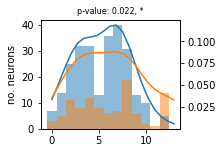

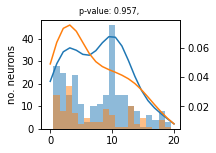

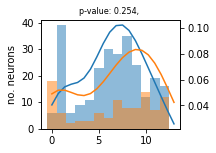

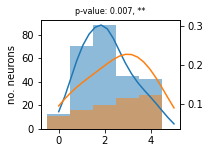

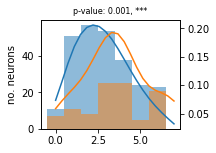

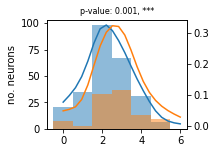

In [18]:
model_names = [
    'wav2letter_modified',
    'wav2vec2',
    'speech2text',
	'whisper_tiny',
	'whisper_base',
	'deepspeech2',
	]
trained_identifier = f'ucsf_mVocs_trf_lags{lag}_bw50_regression_improved'
tikz_indicator = f'trf{lag}'
bin_width = 50
mVocs = True
tikzplots.plot_peak_layer_histograms(
	model_names,
	trained_identifier,
	bin_width=bin_width,
	mVocs=mVocs,
	threshold =threshold,
	save_tikz=save_tikz,
    tikz_indicator=tikz_indicator,
	fontsize=8,
	figsize=(2.5,2),
	)

### testing additional models

INFO:Extracting column: mVocs_normalized_test_cc
INFO:Filtering 'mVocs_normalizer' using multiple of 0.300 with std dev ...
INFO:Extracting column: mVocs_normalized_test_cc
INFO:Filtering 'mVocs_normalizer' using multiple of 0.300 with std dev ...
INFO:Number of channels in core: 348
INFO:Number of channels in non-primary: 246


/tmp/ipykernel_2492183/1198521545.py:9: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  tikzplots.plot_peak_layer_histograms(
/tmp/ipykernel_2492183/1198521545.py:9: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  tikzplots.plot_peak_layer_histograms(


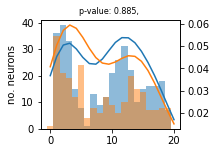

In [3]:
model_names = [
    # 'cochcnn9',
    'w2v2_audioset'
	]
trained_identifier = f'ucsf_mVocs_trf_lags{lag}_bw50_regression_improved'
tikz_indicator = f'trf{lag}'
bin_width = 50
mVocs = True
tikzplots.plot_peak_layer_histograms(
	model_names,
	trained_identifier,
	bin_width=bin_width,
	mVocs=mVocs,
	threshold = threshold,
    tikz_indicator=tikz_indicator,
    save_tikz=save_tikz,
	fontsize=8,
	figsize=(2.5,2),
	)

INFO:Extracting column: normalized_test_cc
INFO:Filtering 'normalizer' using multiple of 0.300 with std dev ...
INFO:Extracting column: normalized_test_cc
INFO:Filtering 'normalizer' using multiple of 0.300 with std dev ...
INFO:Number of channels in core: 348
INFO:Number of channels in non-primary: 150


/tmp/ipykernel_2492183/575910536.py:9: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  tikzplots.plot_peak_layer_histograms(
/tmp/ipykernel_2492183/575910536.py:9: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  tikzplots.plot_peak_layer_histograms(


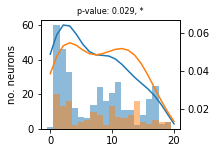

In [4]:
model_names = [
    # 'cochcnn9',
    'w2v2_audioset'
	]
trained_identifier = f'ucsf_timit_trf_lags{lag}_bw50_regression_improved'
tikz_indicator = f'trf{lag}'
bin_width = 50
mVocs = False
tikzplots.plot_peak_layer_histograms(
	model_names,
	trained_identifier,
	bin_width=bin_width,
	mVocs=mVocs,
	threshold = threshold,
    tikz_indicator=tikz_indicator,
    save_tikz=save_tikz,
	fontsize=8,
	figsize=(2.5,2),
	)